In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy as smp
import pandas as pd
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])


# 1

In [8]:
# CONSTANTS
npoint = 10000 # initialization of number of points
a = 1.5 # kpc
v_scale = 5.477*10**(-7) # kpc/year
M_scale = 10**11 # Msolar
pi = np.pi

In [9]:
def initialize(M = 1, R = 1, G = 1):
    # getting x,y,z
    rand = np.random.rand(3)
    r = (rand[0]**(-2/3)-1)**(-1/2)
    z = (1-2*rand[1])*r
    x = (r**2 - z**2)**(1/2) * np.cos(2*pi*rand[2])
    y = (r**2 - z**2)**(1/2) * np.sin(2*pi*rand[2])
    
    V_escape = 2**(1/2) * (1+r**2)**(-1/4)
    # generate X_4 and X_5
    rand = np.random.rand(2)
    # selecting q by comparing to distribution of velocities
    while rand[1] > (rand[0]**2 *(1-rand[0]**2)**(7/2)):
        rand = np.random.rand(2)
    q = rand[0]
    V = V_escape*q

    # generate three velocity from V
    rand = np.random.rand(2)
    v_z = (1-2*rand[0]) * V
    v_x = (V**2 - v_z**2)**(1/2) * np.cos(2*pi*rand[1])
    v_y = (V**2 - v_z**2)**(1/2) * np.sin(2*pi*rand[1])

    # return MCMC generated values in np.array
    return np.array([r, x, y, z, V,v_x, v_y, v_z])



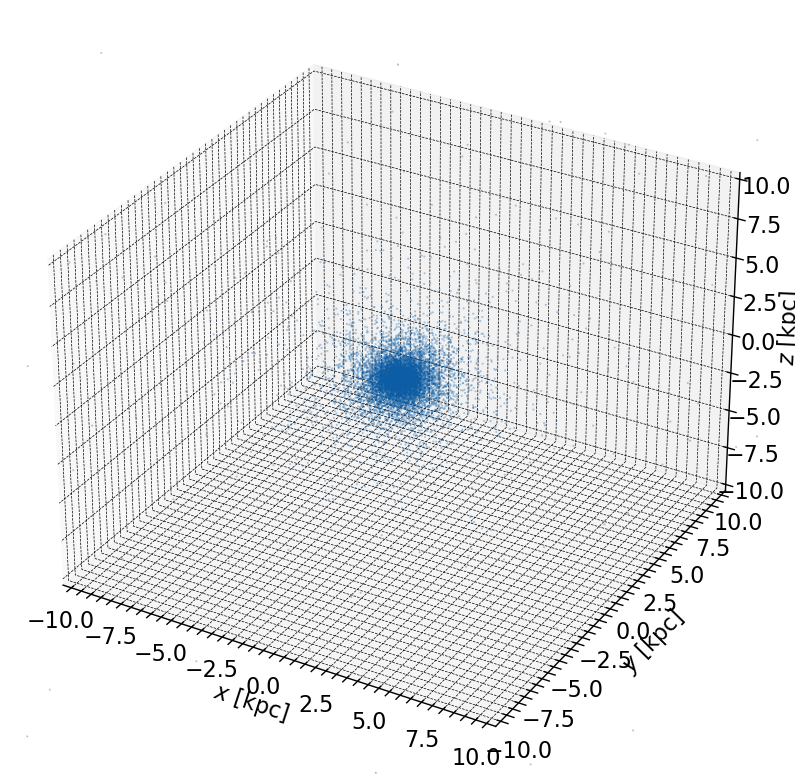

In [10]:
out = np.zeros((npoint, 8)) # container for points
# call initialize() npoints of times to generate the points
for i in range(npoint):
    out[i] =  initialize()

# storing data in panda dataframe
df = pd.DataFrame(out, columns=['r', "r_x", "r_y", "r_z",'V', 'v_x', 'v_y', 'v_z'])
df.to_csv('plummer_regular.csv', index=False)

# grabbing x,y,z cordinate from datafrme
x = df.loc[:,'r_x']
y = df.loc[:,'r_y']
z = df.loc[:,'r_z']

# checking the distribution of positions by plotting
# 3D plot of x, y, z
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, s=0.2)
ax.set_xlabel(r'$x$ [kpc]')
ax.set_ylabel(r'$y$ [kpc]')
ax.set_zlabel(r'$z$ [kpc]')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
plt.tight_layout()
plt.show()

# 2

[]

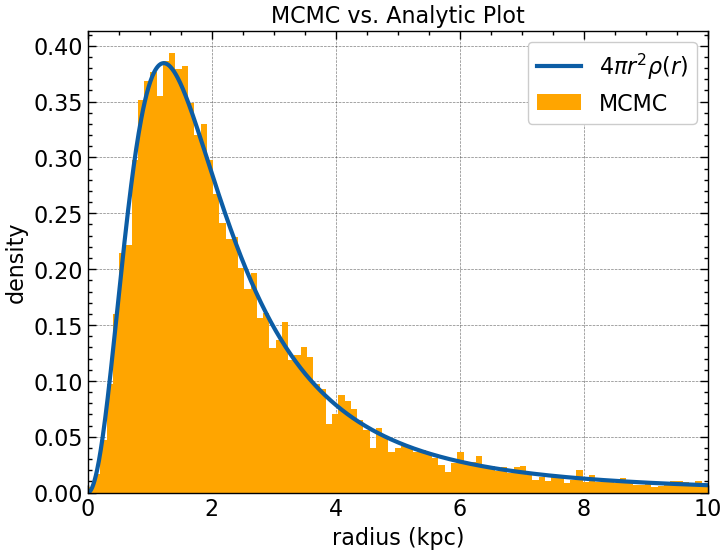

In [11]:
# For scaling, we scale the distance to the unit of 1.5 kpc. So a unit of 1 in our generated 
# distance is equivalent to 1.5 kpc.

def distribution(r, M = 1, R = 1):
    rho = (3/4)*pi*M*R**(-3) * (1+(r/R)**2)**(-5/2) 
    return rho * 4 * pi * r**2

# getting the analytic distribution points 
radius = np.linspace(0,10,1000)
dist = distribution(radius, R=a)

# normalize the analytic distribution
dt = radius[1]-radius[0]
normalization = (dist).sum()*dt
dist = dist / normalization

r = df.loc[:,'r'] # getting r from data structure

# plotting our MCMC data with the analytic expression
plt.plot(radius ,dist, label = r'$4\pi r^2 \rho(r)$', lw=3)
plt.hist(r*a, range=(0, 10), density=True, bins=np.linspace(0,10,100), label = 'MCMC', color = 'orange')
plt.xlim(0, 10)
plt.xlabel('radius (kpc)')
plt.ylabel('density')
plt.title('MCMC vs. Analytic Plot')
plt.legend()
plt.plot()


# 3

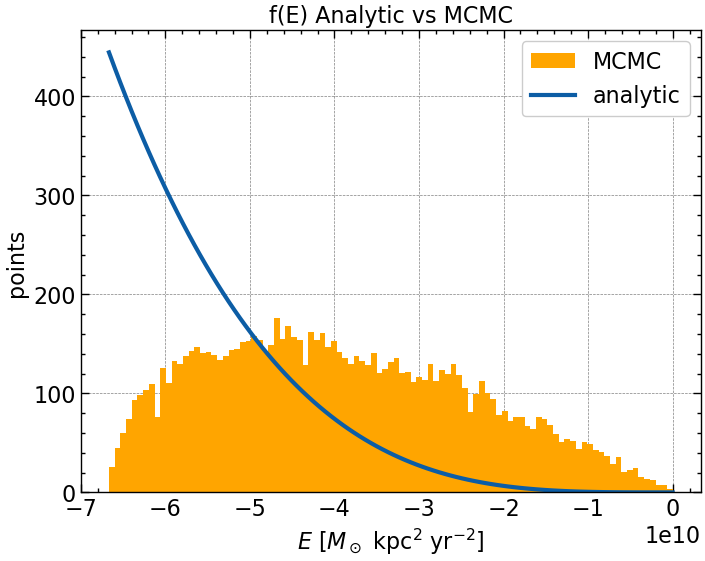

In [12]:
# grabbing radius and velocity magnitiude from dataframe
r = df.loc[:,'r']
v = df.loc[:,'V']

# function that calculate potential energy
def potential(r, M = 1, R = 1, G =1):
    return -G*M*R**(-1)*(1+(r)**2)**(-1/2)

# uniform binning from -GM/a to 0  
bins = np.linspace(-1, 0, 100) * (M_scale/a)

# analytic f(E) function
def f_analytic(E):
    return (24*np.sqrt(2)/(7*pi**3))*(a**2/M_scale**4)*(-E)**(7/2)

# discretized analytic function
f = f_analytic(bins)

# getting the total energy from the potential and kinetic energy for MCMC result
p_Energy = potential(r, M = M_scale, R = a)
k_Energy = 1/2*(v*v_scale)**2
t_Energy = p_Energy + k_Energy

# plotting the analytic against the energy from the MCMC result
plt.hist(t_Energy, bins=bins,label = 'MCMC', color = 'orange')
plt.plot(bins,f*npoint/np.sum(f), label = 'analytic', lw = 3)
plt.xlabel(r"$E$ [$M_\odot$ kpc$^2$ yr$^{-2}$]")
plt.ylabel("points")
plt.title('f(E) Analytic vs MCMC')
plt.legend()
plt.show()



The analytic distribution does not match with the energy distribution calculated from the MCMC generated points because the density of the 6-vector phase spaces for each energy is different. The analytic curve is only a function of the energy alone, and the velocity and distance was not affecting the shape. On the other hand, for our histogram for energy from the MCMC generated points, velocity and distance was involved. Therefore, the energy from MCMC is different from the analytic curve. 